# keras
* 텐서플로우를 엔진으로 사용하는 파이썬 패키지
* 신경망을 쉽게 구현할 수 있도록 해준다
* 연습용 데이터셋 제공

In [20]:
from tensorflow import keras

In [22]:
mnist=keras.datasets.mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


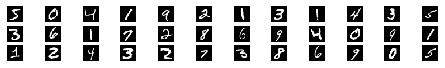

In [24]:
plt.figure(figsize=(8,1))
for i in range(36):
    plt.subplot(3,12,i+1)
    plt.imshow(xtrain[i],cmap='gray')
    plt.axis("off")
plt.show()

In [26]:
print(xtrain.shape)
print(ytrain.shape) # shape을 찍어보면 이미지가 레이블만 저장되어있음을 알 수 있다 --> (6000,10)이런 형태가 아니므로 원핫인코딩 안되어있다
print(xtest.shape)
print(ytest.shape)
print(ytrain.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [33]:
xtrain=xtrain.reshape(60000,28*28).astype('float32')/255.0
xtest=xtest.reshape(60000,28*28).astype('float32')/255.0
print(xtrain.shape,xtrain.dtype)
print(xtest.shape,xtest.dtype)
print(ytrain[:10])

ValueError: cannot reshape array of size 7840000 into shape (60000,784)

In [28]:
from tensorflow.keras.utils import to_categorical
ytrain=to_categorical(ytrain, 10) 
ytest=to_categorical(ytest, 10)
ytrain[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## keras로 신경망 구성하는 순서

1) Sequential 클래스 -> 객체 생성

2) add 매서드 -> 층(레이어)을 추가
* 입력부터 순서대로 추가( 입력->히든레이어->출력)
* activation활성화 설정

3)compile메서드 -> 모델 생성
* loss, optimizer(알고리즘), 성능기준설정(정확도,...)

4)fit 메서드 -> 트레이닝
* 에폭 설정(에폭:1번 트레이닝하는 과정)
* 배치크기설정 (분할 모델링 :큐러너 등 사용하여 배치로 데이터를 읽어들임)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
np.random.seed(0)

In [35]:
model=Sequential()
model.add(Dense(15,input_dim=784,activation='sigmoid')) # Dense()를 이용하여 층을 추가한다 input_dim은 맨처음 입력 층에만 있다
model.add(Dense(10,activation='sigmoid'))
model.compile(optimizer=SGD(lr=0.1),loss='mean_squared_error',metrics=['accuracy'])

W0729 16:17:50.418835 10720 deprecation.py:506] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                11775     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Misson
-> cars.csv에서 mpg,hp 데이터를 가지고 훈련하여
mpg가 10,20,30,40일 때, hp의 값을 예상하는 최적의 cost,w,b를 출력

In [39]:
import pandas as pd
cars=pd.read_csv("/Users/user/Downloads/cars.csv",header=0)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [40]:
carsdata=cars[['Unnamed: 0','mpg','hp']]
carsdata.head()

,Unnamed: 0,mpg,hp
0,Mazda RX4,21.0,110
1,Mazda RX4 Wag,21.0,110
2,Datsun 710,22.8,93
3,Hornet 4 Drive,21.4,110
4,Hornet Sportabout,18.7,175


In [71]:
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)
b=tf.Variable([-3.],tf.float32) # b는 계속 갱신되는 데이터이므로 --> 변수(Variable) 타입이어야한다
w=tf.Variable([3.],tf.float32)

hf=x*w+b
loss = tf.reduce_sum(tf.square(hf-y)) # 계산하면 차원이 줄어들어서 reduce_가 붙는다
train = tf.train.GradientDescentOptimizer(0.00001).minimize(loss) # 러닝레이트 값을 1로 주면 발산(미분값이 1이라는 것, 너무 작으면 변화거의 없음)
xtrain=cars['mpg']
ytrain=cars['hp']

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(200001):   
    sess.run(train,feed_dict={x:xtrain,y:ytrain})
    if step %1000==0:
        wv,bv,lv = sess.run([w,b,loss],feed_dict={x:xtrain,y:ytrain})
        print("w:%s, b:%s, loss:%s" % (wv,bv,lv))

w:[3.8832893], b:[-2.942774], loss:404035.8
w:[5.3930764], b:[13.482447], loss:305490.03
w:[4.6829906], b:[28.989418], loss:281388.3
w:[4.008355], b:[43.722218], loss:259633.11
w:[3.3674023], b:[57.71944], loss:239996.0
w:[2.75845], b:[71.01783], loss:222270.75
w:[2.1799016], b:[83.65226], loss:206271.28
w:[1.630236], b:[95.655945], loss:191829.42
w:[1.1080128], b:[107.06033], loss:178793.61
w:[0.61186266], b:[117.89533], loss:167027.0
w:[0.14048147], b:[128.18945], loss:156405.89
w:[-0.30736318], b:[137.96954], loss:146818.94
w:[-0.73284984], b:[147.2614], loss:138165.33
w:[-1.1370918], b:[156.08928], loss:130354.266
w:[-1.5211529], b:[164.47647], loss:123303.64
w:[-1.88604], b:[172.44492], loss:116939.484
w:[-2.2327094], b:[180.01556], loss:111194.89
w:[-2.5620718], b:[187.20819], loss:106009.64
w:[-2.8749895], b:[194.04176], loss:101329.17
w:[-3.1722827], b:[200.5341], loss:97104.445
w:[-3.4547334], b:[206.70229], loss:93291.03
w:[-3.723085], b:[212.56258], loss:89848.86
w:[-3.97803

w:[-8.816104], b:[323.7847], loss:57935.797
w:[-8.816104], b:[323.7847], loss:57935.797
w:[-8.816104], b:[323.7847], loss:57935.797
w:[-8.816104], b:[323.7847], loss:57935.797
w:[-8.816104], b:[323.7847], loss:57935.797
w:[-8.816104], b:[323.7847], loss:57935.797
w:[-8.816104], b:[323.7847], loss:57935.797
w:[-8.816104], b:[323.7847], loss:57935.797
w:[-8.816104], b:[323.7847], loss:57935.797
w:[-8.816104], b:[323.7847], loss:57935.797
w:[-8.816104], b:[323.7847], loss:57935.797
w:[-8.816104], b:[323.7847], loss:57935.797
w:[-8.816104], b:[323.7847], loss:57935.797
w:[-8.816104], b:[323.7847], loss:57935.797
w:[-8.816104], b:[323.7847], loss:57935.797
w:[-8.816104], b:[323.7847], loss:57935.797
